In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


DATA CLEANING
Handling Missing Values
1>Handling duplicates
3>Check data type
4>Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
## Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [11]:
##Check missing values
## features with nan values
features_with_nan =[features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
df[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


Imputing Null values

median=age

mode=type of contact

median=duration of pitch

mode=no of folloup

mode=prefpropstar

median=noof trips

mode=no of children visiting

median=monthly income 

In [13]:
##Age
df.Age.fillna(df.Age.mean(), inplace=True)
## Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
##Durationof pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
## Number of followups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
## Preferred Property Star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

## Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
## Number of Children
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
##Monthly income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\4209678975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\4209678975.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [14]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [16]:
df.drop('CustomerID',inplace=True,axis=1)

Feature Engineering

In [17]:
#create new column for feature
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [18]:
#get all numeric features
num_features=[features for features in df.columns if df[features].dtype != 'O']
print("Num of numeric features: ", len(num_features))

Num of numeric features:  12


In [19]:
##categorical features
cat_features=[features for features in df.columns if df[features].dtype == 'O']
print("Num of categorical features: ", len(cat_features))

Num of categorical features:  6


In [20]:
discrete_features = [feature for feature in num_features if df[feature].nunique() < 25]
print("Num of discrete features:", len(discrete_features))


Num of discrete features: 9


In [21]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("Num of continuous features:", len(continuous_features))

Num of continuous features: 3


In [22]:
##Train test split and model training
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [23]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [26]:
#Create Column Transformer
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
   [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ])

In [27]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [28]:
##applying Transf in training
X_train=preprocessor.fit_transform(X_train)

In [29]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [30]:
X_test=preprocessor.transform(X_test)

RANDOM FOREST CLASSIFIER TRAINING

In [1]:
!pip install xgboost

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
models={
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Adaboost" :AdaBoostClassifier(),
  ##"Gradient Boost":GradientBoostingClassifier(),
    "XGB":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    ## training test
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred,average="weighted")
    model_train_precision=precision_score(y_train, y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train, y_train_pred)
    ##test performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred,average="weighted")
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test, y_test_pred)
    print(list(models.keys())[i])
    print ("Model performance for training set data")
    print ("Accuracy: ", model_train_accuracy)
    print ("F1 Score: ", model_train_f1)
    print ("Precision: ", model_train_precision)
    print ("Recall: ", model_train_recall)
    print ("ROC AUC: ", model_train_roc_auc)
    print("---------------------------------------")
    print ("Model performance for test set data")
    print ("Accuracy: ", model_test_accuracy)
    print ("F1 Score: ", model_test_f1)
    print ("Precision: ", model_test_precision)
    print ("Recall: ", model_test_recall)
    print ("ROC AUC: ", model_test_roc_auc)
    print("---------------------------------------")

Decision Tree
Model performance for training set data
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC AUC:  1.0
---------------------------------------
Model performance for test set data
Accuracy:  0.9141104294478528
F1 Score:  0.9130425546195434
Precision:  0.7988826815642458
Recall:  0.7486910994764397
ROC AUC:  0.8514738851892999
---------------------------------------
Random Forest
Model performance for training set data
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC AUC:  1.0
---------------------------------------
Model performance for test set data
Accuracy:  0.9263803680981595
F1 Score:  0.9204103378197602
Precision:  0.968503937007874
Recall:  0.643979057591623
ROC AUC:  0.8194482327348203
---------------------------------------
Adaboost
Model performance for training set data
Accuracy:  0.8478260869565217
F1 Score:  0.8146439190446891
Precision:  0.7815126050420168
Recall:  0.2551440329218107
ROC AUC:  0.6193984861245332
-----------------------

In [41]:
##Hyperparameter Tuning
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000],

}
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R'],
    
}
# gradient_params={'loss':['log_loss','deviance','exponential'],
#                  'criterion':['friedman_mse','squared_error','mse'],
#                  'min_samples_split':[2,8,15,20],
#                  'n_estimators':[100,200,500,1000],
#                  'max_depth':[5,8,15,None,10]


# }
xgboost_params={
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]
}

In [49]:
#Models list for Hyperparameter tuning
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("AB",AdaBoostClassifier(),adaboost_param),
    ##("GB",GradientBoostingClassifier(),gradient_params)
    ("Xgboost",XGBClassifier(),xgboost_params)
]

In [50]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=No

In [51]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"------------------------Best Params for {model_name}------------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------Best Params for RF------------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
------------------------Best Params for AB------------------------
{'n_estimators': 80, 'algorithm': 'SAMME'}
------------------------Best Params for Xgboost------------------------
{'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [54]:
from sklearn.metrics import roc_auc_score,roc_curve
models={
    "Random Forest":RandomForestClassifier(n_estimators= 1000,min_samples_split=2,max_features=8,max_depth=None),
    "Adaboost" :AdaBoostClassifier(n_estimators= 80,algorithm='SAMME'),
    ##"Gradient Boost":GradientBoostingClassifier(n_estimators=500,min_samples_split=8,max_depth=10,loss='exponential',criterion='squared_error')
    "Xg boost":XGBClassifier(n_estimators=200,max_depth=30,learning_rate=0.1,colsample_bytree=0.8)
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    ## training test
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred)
    model_train_precision=precision_score(y_train, y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train, y_train_pred)
    ##test performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred,average="weighted")
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test, y_test_pred)
    print(list(models.keys())[i])
    print ("Model performance for training set data")
    print ("Accuracy: ", model_train_accuracy)
    print ("F1 Score: ", model_train_f1)
    print ("Precision: ", model_train_precision)
    print ("Recall: ", model_train_recall)
    print ("ROC AUC: ", model_train_roc_auc)
    print("---------------------------------------")
    print ("Model performance for test set data")
    print ("Accuracy: ", model_test_accuracy)
    print ("F1 Score: ", model_test_f1)
    print ("Precision: ", model_test_precision)
    print ("Recall: ", model_test_recall)
    print ("ROC AUC: ", model_test_roc_auc)
    print("---------------------------------------")

Random Forest
Model performance for training set data
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC AUC:  1.0
---------------------------------------
Model performance for test set data
Accuracy:  0.9376278118609407
F1 Score:  0.9338014672789755
Precision:  0.9642857142857143
Recall:  0.7068062827225131
ROC AUC:  0.8502265212850177
---------------------------------------


c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Adaboost
Model performance for training set data
Accuracy:  0.8465473145780051
F1 Score:  0.38016528925619836
Precision:  0.7698744769874477
Recall:  0.252400548696845
ROC AUC:  0.6175551941849519
---------------------------------------
Model performance for test set data
Accuracy:  0.83640081799591
F1 Score:  0.797683978346618
Precision:  0.7818181818181819
Recall:  0.225130890052356
ROC AUC:  0.6049415568432047
---------------------------------------
Xg boost
Model performance for training set data
Accuracy:  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
ROC AUC:  1.0
---------------------------------------
Model performance for test set data
Accuracy:  0.9580777096114519
F1 Score:  0.9565261506518231
Precision:  0.9746835443037974
Recall:  0.806282722513089
ROC AUC:  0.9006000651955532
---------------------------------------


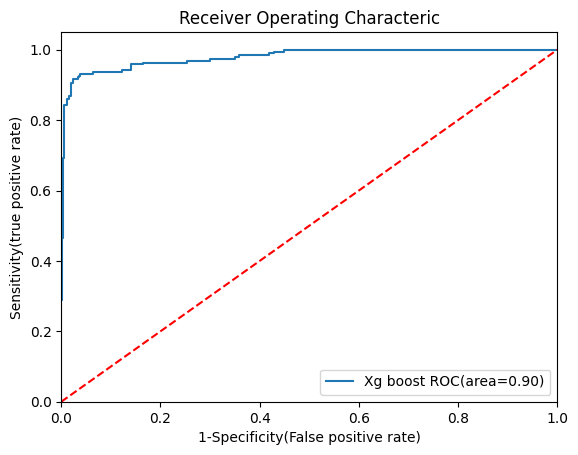

In [57]:
##Plot ROC AUC Curve
# from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()
#Add the models to list
auc_models=[
    {
        'label':'Xg boost',
        'model':XGBClassifier(n_estimators=200,max_depth=30,learning_rate=0.1,colsample_bytree=0.8),
        'auc':0.9006
    }
]
for algo in auc_models:
    model=algo['model']
    model.fit(X_train,y_train)
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    #Calculate Area under curve to display
    plt.plot(fpr,tpr,label='%s ROC(area=%0.2f)'%(algo['label'],algo['auc']))
    #Custom settings for plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-Specificity(False positive rate)')
    plt.ylabel('Sensitivity(true positive rate)')
    plt.title('Receiver Operating Characteric')
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()